<h1><center>This Notebook contains Text Classification using Word Embeddings</center></h1>
    
<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref1">Text Classification along with training Word Embeddings</a></li>
<li><a href="#ref2">Text Classification Using Pre-trained Word Embeddings</a></li>

</div>


<a id="ref1"></a>
### Text Classification along with training Word Embeddings

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", 
             "and", "any", "are", "as", "at", "be", "because", "been", "before", 
             "being", "below", "between", "both", "but", "by", "could", "did", "do", 
             "does", "doing", "down", "during", "each", "few", "for", "from", 
             "further", "had", "has", "have", "having", "he", "he'd", "he'll", 
             "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", 
             "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", 
             "most", "my", "myself", "nor", "of", "on", "once", "only", "or", 
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", 
             "same", "she", "she'd", "she'll", "she's", "should", "so", "some", 
             "such", "than", "that", "that's", "the", "their", "theirs", "them", 
             "themselves", "then", "there", "there's", "these", "they", "they'd", 
             "they'll", "they're", "they've", "this", "those", "through", "to", 
             "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
             "we're", "we've", "were", "what", "what's", "when", "when's", "where",
             "where's", "which", "while", "who", "who's", "whom", "why", "why's", 
             "with", "would", "you", "you'd", "you'll", "you're", "you've", "your",
             "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [4]:
#parsing text file
with open("./bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)
print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [5]:
#splitting dataset
train_size = int(len(sentences) * training_portion)
train_sentences = sentences[:train_size]
train_labels = labels[:train_size]
validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]
print(len(sentences))
print(len(train_sentences))
print(len(validation_sentences))

2225
1780
445


In [6]:
#tokenizing sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

In [7]:
word_index = tokenizer.word_index
total_words = len(word_index)+1 #1 for oov word
print(total_words)
print(word_index)

27286
{'<OOV>': 1, 's': 2, 'said': 3, 'will': 4, 'not': 5, 'mr': 6, 'year': 7, 'also': 8, 'people': 9, 'new': 10, 'us': 11, 'one': 12, 'can': 13, 'last': 14, 't': 15, 'first': 16, 'time': 17, 'two': 18, 'government': 19, 'world': 20, 'now': 21, 'uk': 22, 'best': 23, 'years': 24, 'no': 25, 'make': 26, 'just': 27, 'film': 28, 'told': 29, 'made': 30, 'get': 31, 'music': 32, 'game': 33, 'like': 34, 'back': 35, 'many': 36, '000': 37, 'labour': 38, 'three': 39, 'well': 40, '1': 41, 'next': 42, 'bbc': 43, 'take': 44, 'set': 45, 'number': 46, 'added': 47, 'way': 48, 'market': 49, '2': 50, 'company': 51, 'may': 52, 'says': 53, 'election': 54, 'home': 55, 'off': 56, 'party': 57, 'good': 58, 'going': 59, 'much': 60, 'work': 61, '2004': 62, 'still': 63, 'win': 64, 'show': 65, 'think': 66, 'games': 67, 'go': 68, 'top': 69, 'second': 70, 'won': 71, 'million': 72, '6': 73, 'england': 74, 'firm': 75, 'since': 76, 'week': 77, 'say': 78, 'play': 79, 'part': 80, 'public': 81, 'use': 82, 'blair': 83, '3':

In [8]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

In [9]:
print(len(train_sentences[0]))
print(len(train_sequences[0]))
print(len(train_padded[0]))
print()
print(train_sentences[0])
print(train_sequences[0])
print(train_padded[0])


3123
449
120

tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte ente

In [10]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [11]:
print(len(validation_sentences[0]))
print(len(train_sequences[0]))
print(len(validation_padded[0]))
print()
print(validation_sentences[0])
print(validation_sequences[0])
print(validation_padded[0])

1100
449
120

hobbit picture  four years away  lord rings director peter jackson said will four years starts work film version hobbit.  oscar winner said visit sydney  desire  make  not lengthy negotiations.  think s gonna lot lawyers sitting room trying thrash deal will ever happen   said new zealander. rights jrr tolkien s book split two major film studios. jackson  currently filming remake hollywood classic king kong  said thought sale mgm studios sony corporation cast uncertainty project. 43-year-old australian city visit lord rings exhibition  attracted 140 000 visitors since opened december.  film-maker recently sued film company new line cinema undisclosed damages alleged withheld profits lost revenue first part middle earth trilogy. fellowship ring 2001 went make worldwide profits $291 million (Â£152 million). jackson thought secured lucrative film directing deal history remake king kong  currently production wellington. picture  stars naomi watts oscar winner adrien brody  due

In [12]:
#tokenizing labels
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [13]:
print(training_label_seq)
print(training_label_seq.shape)

[[4]
 [2]
 [1]
 ...
 [1]
 [2]
 [5]]
(1780, 1)


In [14]:
#creating model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq), 
                    verbose=2)

Train on 1780 samples, validate on 445 samples
Epoch 1/30
1780/1780 - 4s - loss: 1.7554 - accuracy: 0.2219 - val_loss: 1.7154 - val_accuracy: 0.2270
Epoch 2/30
1780/1780 - 0s - loss: 1.6732 - accuracy: 0.2303 - val_loss: 1.6259 - val_accuracy: 0.2270
Epoch 3/30
1780/1780 - 0s - loss: 1.5719 - accuracy: 0.2787 - val_loss: 1.5189 - val_accuracy: 0.3843
Epoch 4/30
1780/1780 - 0s - loss: 1.4412 - accuracy: 0.5298 - val_loss: 1.3730 - val_accuracy: 0.5730
Epoch 5/30
1780/1780 - 0s - loss: 1.2639 - accuracy: 0.6708 - val_loss: 1.1915 - val_accuracy: 0.7483
Epoch 6/30
1780/1780 - 0s - loss: 1.0728 - accuracy: 0.7865 - val_loss: 1.0146 - val_accuracy: 0.8247
Epoch 7/30
1780/1780 - 0s - loss: 0.8997 - accuracy: 0.8461 - val_loss: 0.8606 - val_accuracy: 0.8472
Epoch 8/30
1780/1780 - 0s - loss: 0.7467 - accuracy: 0.8899 - val_loss: 0.7301 - val_accuracy: 0.8764
Epoch 9/30
1780/1780 - 0s - loss: 0.6124 - accuracy: 0.9169 - val_loss: 0.6185 - val_accuracy: 0.8876
Epoch 10/30
1780/1780 - 0s - loss: 

In [16]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

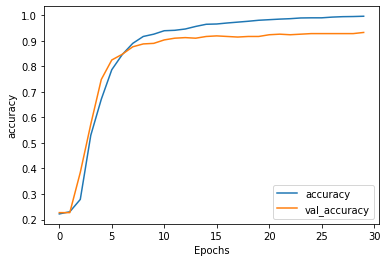

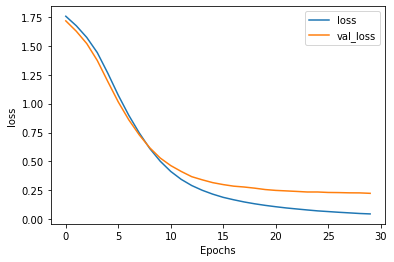

In [17]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
#visualizing embedded words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [20]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [21]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

#use tensorflow embedding projector to visualize results by uploading this vector and metadata

<a id="ref2"></a>
### Text Classification using Pre-trained Word Embeddings

In [23]:
embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=160000
test_portion=.1

In [25]:
corpus = []

num_sentences = 0
with open("./training_cleaned.csv",encoding="utf8") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        list_item=[]
        list_item.append(row[5])
        this_label=row[0]
        if this_label=='0':
            list_item.append(0)
        else:
            list_item.append(1)
        num_sentences = num_sentences + 1
        corpus.append(list_item)


In [26]:
print(num_sentences)
print(len(corpus))
print(corpus[0][0])
print(corpus[0][1])

1600000
1600000
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
0


In [28]:
import random
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)+1

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

print(vocab_size)
print(word_index['i'])

138631
1


In [30]:
embeddings_index = {}
with open('./glove.6B.100d.txt',encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
        
embeddings_matrix = np.zeros((vocab_size, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

print(embeddings_matrix.shape)

(138631, 100)


In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, 
                              weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 100)           13863100  
_________________________________________________________________
dropout (Dropout)            (None, 16, 100)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 12, 64)            32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 13,928,253
Trainable params: 65,153
Non-trainable params: 13,863,100
_____________________________________

In [32]:
num_epochs = 50
history = model.fit(training_sequences, np.array(training_labels), epochs=num_epochs, 
                    validation_data=(test_sequences, np.array(test_labels)), verbose=2)

Train on 144000 samples, validate on 16000 samples
Epoch 1/50
144000/144000 - 178s - loss: 0.5680 - accuracy: 0.6984 - val_loss: 0.5284 - val_accuracy: 0.7337
Epoch 2/50
144000/144000 - 171s - loss: 0.5279 - accuracy: 0.7322 - val_loss: 0.5134 - val_accuracy: 0.7416
Epoch 3/50
144000/144000 - 169s - loss: 0.5093 - accuracy: 0.7451 - val_loss: 0.5120 - val_accuracy: 0.7431
Epoch 4/50
144000/144000 - 167s - loss: 0.4995 - accuracy: 0.7526 - val_loss: 0.5075 - val_accuracy: 0.7503
Epoch 5/50
144000/144000 - 170s - loss: 0.4910 - accuracy: 0.7583 - val_loss: 0.5069 - val_accuracy: 0.7504
Epoch 6/50
144000/144000 - 169s - loss: 0.4826 - accuracy: 0.7638 - val_loss: 0.5084 - val_accuracy: 0.7454
Epoch 7/50
144000/144000 - 169s - loss: 0.4772 - accuracy: 0.7671 - val_loss: 0.5014 - val_accuracy: 0.7541
Epoch 8/50
144000/144000 - 169s - loss: 0.4730 - accuracy: 0.7695 - val_loss: 0.5046 - val_accuracy: 0.7509
Epoch 9/50
144000/144000 - 169s - loss: 0.4667 - accuracy: 0.7737 - val_loss: 0.5044 

In [33]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

<Figure size 432x288 with 0 Axes>

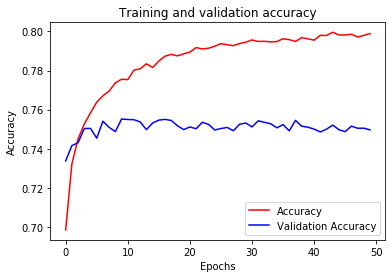

<Figure size 432x288 with 0 Axes>

In [34]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

<Figure size 432x288 with 0 Axes>

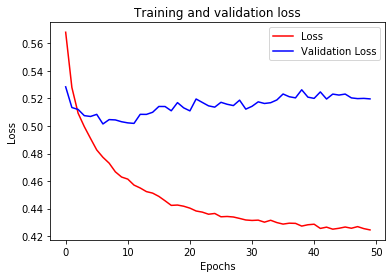

<Figure size 432x288 with 0 Axes>

In [35]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()